<img src="https://drive.google.com/uc?id=1yDiPabrhY3LMN0pV9bWgTEYwr6Wfzu14
" width="500"/>

<div style="text-align: center;">
  <img src="https://www.pngall.com/wp-content/uploads/11/Starcraft-Logo-PNG-Photos.png">
</div>

# Evaluación Parcial N°1

### Data Set: starcraft_duoc.csv


Integrantes:
* Cristian Contreras V.
* Esteban Díaz C.
* Marian Moreno O.

Docente: Arturo Guerra Castro    

Sección: BIY7121 - 004V

### Contexto del caso

StarCraft II es un juego de estrategia en tiempo real (RTS) desarrollado por Blizzard Entertainment. Lanzado en 2010, es la secuela del icónico StarCraft original. El juego se ambienta en un futuro distante, donde tres facciones, los humanos terran, los enjambres zerg y los misteriosos protoss, luchan por el control del sector Koprulu. Los jugadores pueden elegir una de las tres razas, cada una con habilidades únicas y estrategias distintas. StarCraft II presenta una campaña envolvente con una narrativa rica y desafiantes misiones para cada raza. Además, destaca en el ámbito multijugador, donde jugadores de todo el mundo compiten en emocionantes batallas. El juego ha alcanzado un estatus destacado en los deportes electrónicos (eSports), con una comunidad activa y competiciones de alto nivel. La gestión de recursos, la toma de decisiones estratégicas y la velocidad de ejecución son fundamentales en StarCraft II, lo que lo convierte en un desafío constante. Con gráficos impresionantes, una jugabilidad sólida y una escena competitiva vibrante, StarCraft II sigue siendo una referencia en el mundo de los juegos de estrategia en tiempo real.

$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Variable } & \text { Descripción } \\
\hline {GameID} & \text {Unique ID for each game }  \\
\hline \text{ LeagueIndex} & \text { 1-8 for Bronze, Silver, Gold, Diamond, Master, GrandMaster, Professional leagues} \\
\hline \text{ Age} & \text { Age of each player } \\
\hline \text{ HoursPerWeek} & \text { Hours spent playing per week } \\
\hline \text{ TotalHours} & \text { Total hours spent playing } \\
\hline \text{ APM} & \text { Action per minute } \\
\hline \text{ SelectByHotkeys} & \text { Number of unit selections made using hotkeys per timestamp} \\
\hline \text{ AssignToHotkeys} & \text { Number of units assigned to hotkeys per timestamp} \\
\hline \text{ MinimapAttacks} & \text {  Number of attack actions on minimal per timestamp} \\
\hline \text{ MinimapRightClicks} & \text {  Number of right-clicks on minimal per timestamp} \\
\hline \text{ NumberOfPACs} & \text { Number of PACs per timestamp} \\
\hline \text{ GapBetweenPACs} & \text { Mean duration between PACs (milliseconds)} \\
\hline \text{ ActionLatency} & \text {  Mean latency from the onset of PACs to their first action (milliseconds)} \\
\hline \text{ ActionsInPAC} & \text {  Mean number of actions within each PAC } \\
\hline \text{ TotalMapExplored} & \text { Number of 24x24 game coordinate grids viewed by player per timestamp} \\
\hline \text{ WorkersMade} & \text {Number of SCVs, drones, probes trained per timestamp} \\
\hline \text{ UniqueUnitsMade} & \text { Unique units made per timestamp } \\
\hline \text{ ComplexUnitsMade} & \text { Number of ghosts, investors, and high templars trained per timestamp } \\
\hline \text{ ComplexAbilityUsed} & \text {Abilities requiring specific targeting instructions used per timestamp} \\
\hline \text{ MaxTimeStamp} & \text { Time stamp of game's last recorded event} \\
\hline
\end{array}
\end{aligned}
$$


## Fase 1: Business Understanding

In [2]:
# Importamos librerías

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import re


Se leerá el archivo csv desde github

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DUOC UC/SEMESTRE 7/Data Mining/Evaluacion parcial 1/starcraft_duoc.csv', ";")

<ipython-input-7-3917dd9a3fcb>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('/content/drive/MyDrive/DUOC UC/SEMESTRE 7/Data Mining/Evaluacion parcial 1/starcraft_duoc.csv', ";")



Bajo el enfoque del modelo CRISP-DM, la comprensión del contexto del negocio se convierte en un elemento esencial tanto para el análisis de datos como para la identificación de los aspectos críticos dentro del ámbito de estudio en este caso de análisis de datos relacionados con el rendimiento de los jugadores en un juego en línea.

En el contexto específico del juego en línea, se nos proporciona una orientación general que abarca una descripción detallada de las variables, sus posibles transformaciones, los valores que pueden tomar y sus respectivas explicaciones. Todo esto se realiza con el objetivo de proporcionar una visión más clara y completa de los datos que serán objeto de análisis. Además, esta información nos permite visualizar las posibles relaciones entre las variables, sentando las bases para un análisis y modelado posteriores.

La descripción general de los datos también desempeña un papel fundamental al proporcionarnos pistas y suposiciones valiosas, lo que a su vez nos permite formular hipótesis sólidas. Estas hipótesis se convierten en el punto de partida para anticipar las posibles predicciones que podríamos generar mediante el análisis y modelado de este conjunto de datos, lo que resulta crucial en el contexto del juego en línea para entender mejor el rendimiento de los jugadores y cómo mejorar su experiencia de juego.

###Hipotesis
1. **Rendimiento del jugador en función de la experiencia y la práctica:** Podemos analizar cómo la edad y las horas dedicadas a jugar impactan en el rendimiento de los jugadores, medido por el Action per Minute (APM).

2. **Patrones de juego basados en la liga del jugador:** Podemos analizar si existen diferencias significativas en el estilo de juego entre jugadores de diferentes ligas (Bronze, Silver, Gold, etc.), utilizando variables como APM, selección de unidades mediante hotkeys y acciones en el minimapa.

3. **Relación entre la experiencia total y el rendimiento del jugador:** Podemos explorar cómo la experiencia total de juego de un jugador se relaciona con su rendimiento en términos de APM, asignación de hotkeys y acciones de minimapa, entre otros.

4. **Efecto del tiempo de juego por semana en el rendimiento:** Podríamos investigar si el número de horas que un jugador dedica al juego por semana afecta su APM, selección de unidades y otras métricas de desempeño.

5. **Evolución del rendimiento durante una partida:** Podemos analizar cómo evolucionan las métricas de rendimiento a lo largo del tiempo dentro de una partida, utilizando variables como el Gap Between PACs, Action Latency y Actions In PAC.

Estas hipótesis nos proporcionan puntos de partida para explorar y analizar los datos disponibles, lo que nos permitirá generar insights útiles para comprender mejor el juego y el rendimiento de los jugadores en él.

## Fase 2: Data Understanding

###Visión General de los datos

In [ ]:
#Visión General de los datos
df

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.718,0.003515159,0.000219697,0.000109849,0.000392317,0.004849,326.677,408.673,47.508,0.000220,0.0013966,4.71e-05,0,0,127448
1,55,5,23.0,10.0,5000.0,1.292.322,0.003303812,0.000259462,0.000294057,0.000432436,0.004307,329.194,423.454,48.434,0.000381,0.0011935,8.65e-05,0,0.00020757,57812
2,56,4,30.0,10.0,200.0,699.612,0.001101091,0.00033557,0.000293624,0.000461409,0.002926,446.475,753.548,4.043,0.000231,0.00074455,6.29e-05,0,0.00018876,95360
3,57,3,19.0,20.0,400.0,1.076.016,0.001033542,0.000213101,5.33e-05,0.000543409,0.003783,292.203,537.352,49.155,0.000202,0.0004262,7.46e-05,0,0.00038358,93852
4,58,3,32.0,10.0,500.0,1.228.908,0.001136014,0.000327326,0,0.001328558,0.002368,226.885,620.813,9.374,0.000289,0.0011745,7.7e-05,0,1.93e-05,51936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,NaN,NaN,NaN,2.596.296,0.020425314,0.00074296,0.000621163,0.000146156,0.004555,186.059,428.342,62.754,0.000560,0.00087694,6.09e-05,0,0,82104
3391,10090,8,NaN,NaN,NaN,314.67,0.028043136,0.001157179,0.000246208,0.001083317,0.004259,143.023,361.156,71.965,0.000394,0.00078787,9.85e-05,0,0,40616
3392,10092,8,NaN,NaN,NaN,2.994.282,0.028341014,0.000860215,0.000337942,0.000168971,0.004439,124.028,395.156,63.979,0.000292,0.0012596,6.14e-05,0,0,65100
3393,10094,8,NaN,NaN,NaN,3.758.664,0.036435894,0.000594265,0.000204279,0.000779973,0.004346,11.691,348.547,79.615,0.000279,0.00061284,0.000111425,0,0.00063141,53848


In [ ]:
# Realizamos obtención de los tipos de datos del DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GameID              3395 non-null   int64  
 1   LeagueIndex         3395 non-null   int64  
 2   Age                 3340 non-null   float64
 3   HoursPerWeek        3339 non-null   float64
 4   TotalHours          3338 non-null   float64
 5   APM                 3395 non-null   object 
 6   SelectByHotkeys     3395 non-null   object 
 7   AssignToHotkeys     3395 non-null   object 
 8   MinimapAttacks      3395 non-null   object 
 9   MinimapRightClicks  3395 non-null   object 
 10  NumberOfPACs        3395 non-null   float64
 11  GapBetweenPACs      3395 non-null   object 
 12  ActionLatency       3395 non-null   object 
 13  ActionsInPAC        3395 non-null   float64
 14  TotalMapExplored    3395 non-null   float64
 15  WorkersMade         3395 non-null   object 
 16  Unique

In [ ]:
#Determinamos la cantidad de datos nulos del DataSet
df.isna().sum()

GameID                 0
LeagueIndex            0
Age                   55
HoursPerWeek          56
TotalHours            57
APM                    0
SelectByHotkeys        0
AssignToHotkeys        0
MinimapAttacks         0
MinimapRightClicks     0
NumberOfPACs           0
GapBetweenPACs         0
ActionLatency          0
ActionsInPAC           0
TotalMapExplored       0
WorkersMade            0
UniqueUnitsMade        0
ComplexUnitsMade       0
ComplexAbilityUsed     0
MaxTimeStamp           0
dtype: int64

In [ ]:
#Vemos los datos unicos presentes en el DataSet
df.nunique()

GameID                3395
LeagueIndex              8
Age                     28
HoursPerWeek            32
TotalHours             237
APM                   3374
SelectByHotkeys       3373
AssignToHotkeys       3306
MinimapAttacks        1728
MinimapRightClicks    3159
NumberOfPACs          3386
GapBetweenPACs        3358
ActionLatency         3367
ActionsInPAC          3223
TotalMapExplored      3327
WorkersMade           3256
UniqueUnitsMade       1367
ComplexUnitsMade      1059
ComplexAbilityUsed    1658
MaxTimeStamp          2867
dtype: int64

In [ ]:
#Revisamos los valores unicos de cada columna
def listar_valores_unicos(df, columnas):
    for columna in columnas:
        valores_unicos = df[columna].unique()
        num_valores_unicos = len(valores_unicos)
        print(f"Columna: {columna}")
        print(f"Número de valores diferentes: {num_valores_unicos}")
        print("Valores únicos:")
        print(valores_unicos)
        print("---------------------------------------------")
        print("\n")

# Nombres de las columnas
nombres_columnas = ['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours',
                    'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'MinimapAttacks',
                    'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs',
                    'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade',
                    'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilityUsed',
                    'MaxTimeStamp']

# Llamada a la función
listar_valores_unicos(df, nombres_columnas)

Columna: LeagueIndex
Número de valores diferentes: 8
Valores únicos:
[5 4 3 2 1 7 6 8]
---------------------------------------------


Columna: Age
Número de valores diferentes: 28
Valores únicos:
[27. 23. 30. 19. 32. 21. 17. 20. 18. 16. 26. 38. 28. 25. 22. 29. 24. 35.
 31. 33. 37. 40. 34. 43. 41. 36. 44. 39.]
---------------------------------------------


Columna: HoursPerWeek
Número de valores diferentes: 33
Valores únicos:
[ 10.          20.           6.           8.          42.
  14.          24.          16.           4.          12.
  30.          28.          70.           2.          56.
  36.          40.          18.          96.          50.
 168.          48.          84.           0.          72.
 112.          90.          32.          98.         140.
  15.91075172  80.          60.        ]
---------------------------------------------


Columna: TotalHours
Número de valores diferentes: 238
Valores únicos:
[3.00000000e+03 5.00000000e+03 2.00000000e+02 4.00000000e+02
 

In [ ]:
#Imputacion de valores Nulos

# Calcula el valor medio de cada columna
mean_hours_per_week = df['HoursPerWeek'].mean()
mean_total_hours = df['TotalHours'].mean()

# Imputa los valores medios en las columnas faltantes
df['HoursPerWeek'].fillna(mean_hours_per_week, inplace=True)
df['TotalHours'].fillna(mean_total_hours, inplace=True)

# Calcula la moda de la columna Age
mode_age = df['Age'].mode()[0]  # El [0] es para obtener el valor en lugar de la Serie

# Llena los valores faltantes en la columna Age con la moda
df['Age'].fillna(mode_age, inplace=True)

# Verificamos que los valores faltantes se hayan llenado correctamente
print("Valores faltantes después de la imputación:")
print(df.isnull().sum())

Valores faltantes después de la imputación:
GameID                0
LeagueIndex           0
Age                   0
HoursPerWeek          0
TotalHours            0
APM                   0
SelectByHotkeys       0
AssignToHotkeys       0
MinimapAttacks        0
MinimapRightClicks    0
NumberOfPACs          0
GapBetweenPACs        0
ActionLatency         0
ActionsInPAC          0
TotalMapExplored      0
WorkersMade           0
UniqueUnitsMade       0
ComplexUnitsMade      0
ComplexAbilityUsed    0
MaxTimeStamp          0
dtype: int64


In [ ]:
# Filtramos las columnas de tipo 'object'
object_columns = df.select_dtypes(include=['object'])

# Contamos cuántas columnas son de tipo 'object'
num_object_columns = object_columns.shape[1]

print(f"Número de columnas de tipo 'object': {num_object_columns}")
print("Nombres de las columnas de tipo 'object':")
for column_name in object_columns.columns:
    print(column_name)

Número de columnas de tipo 'object': 11
Nombres de las columnas de tipo 'object':
APM
SelectByHotkeys
AssignToHotkeys
MinimapAttacks
MinimapRightClicks
GapBetweenPACs
ActionLatency
WorkersMade
UniqueUnitsMade
ComplexUnitsMade
ComplexAbilityUsed


In [ ]:
# Lista de columnas que se convertirán a tipos numéricos
columns_to_convert = ['APM', 'SelectByHotkeys', 'AssignToHotkeys', 'MinimapAttacks',
                      'MinimapRightClicks', 'GapBetweenPACs', 'ActionLatency',
                      'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilityUsed']

# Convierte las columnas a tipos numéricos
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Verifica los tipos de datos después de la conversión
print(df.dtypes)

GameID                  int64
LeagueIndex             int64
Age                   float64
HoursPerWeek          float64
TotalHours            float64
APM                   float64
SelectByHotkeys       float64
AssignToHotkeys       float64
MinimapAttacks        float64
MinimapRightClicks    float64
NumberOfPACs          float64
GapBetweenPACs        float64
ActionLatency         float64
ActionsInPAC          float64
TotalMapExplored      float64
WorkersMade           float64
UniqueUnitsMade       float64
ComplexUnitsMade      float64
ComplexAbilityUsed    float64
MaxTimeStamp            int64
dtype: object


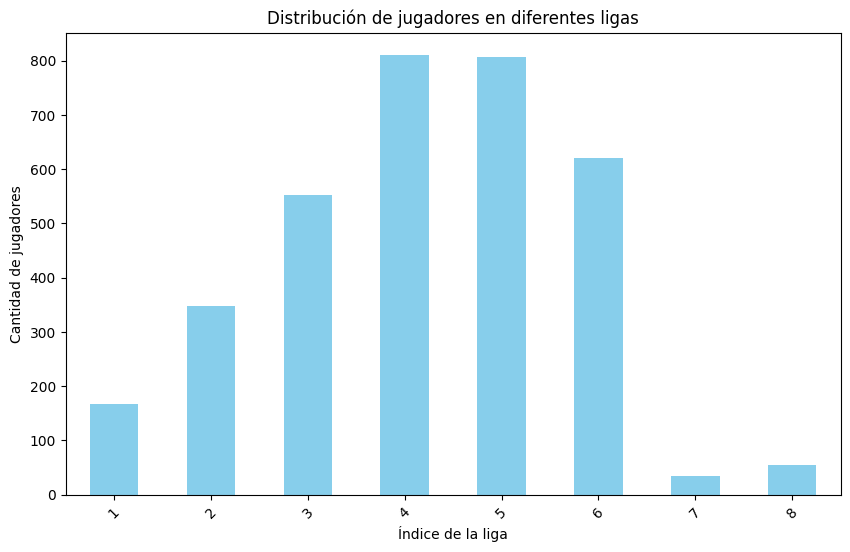

In [ ]:
# Gráfico de barras para la distribución de jugadores en diferentes ligas (LeagueIndex)
plt.figure(figsize=(10, 6))
df['LeagueIndex'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de jugadores en diferentes ligas')
plt.xlabel('Índice de la liga')
plt.ylabel('Cantidad de jugadores')
plt.xticks(rotation=45)
plt.show()

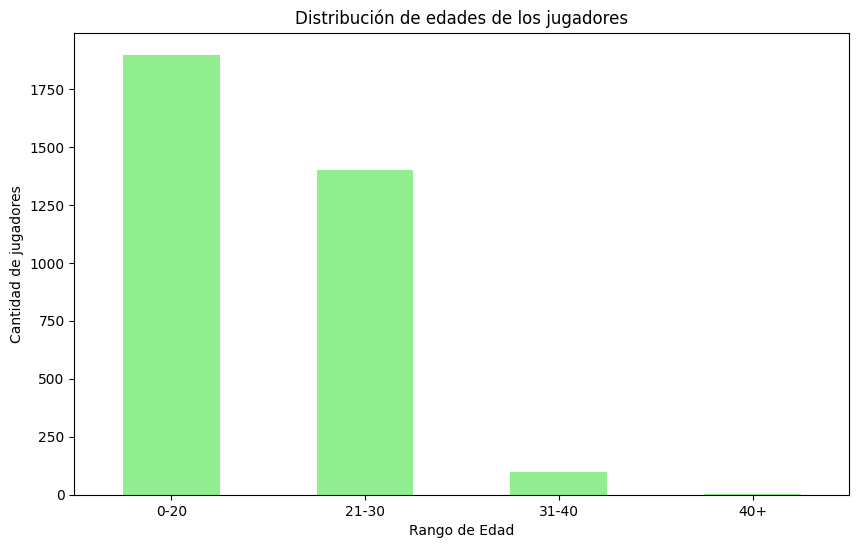

In [ ]:
# Agrupar las edades en rangos y crear un gráfico de barras para mostrar la distribución de edades de los jugadores
# Definir los límites de los rangos de edad
age_bins = [0, 21, 31, 41, float('inf')]  # Definir los límites de los rangos de edad

# Crear una nueva columna en el DataFrame que contenga los rangos de edad
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=['0-20', '21-30', '31-40', '40+'])

# Contar la cantidad de jugadores en cada grupo de edad
age_group_counts = df['Age_Group'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribución de edades de los jugadores')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de jugadores')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para que sean legibles
plt.show()

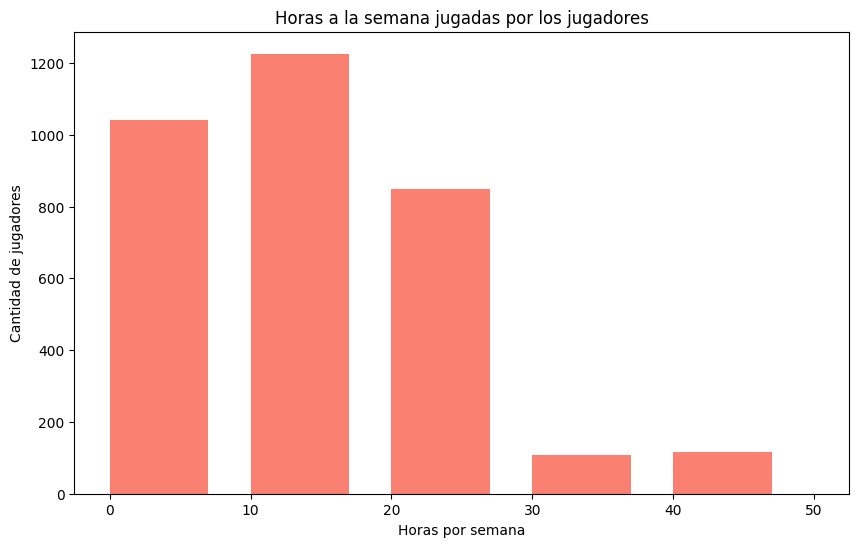

In [ ]:
# Gráfico de barras para mostrar cuántas horas a la semana juegan los jugadores en diferentes rangos de tiempo
plt.figure(figsize=(10, 6))
hours_bins = [0, 10, 20, 30, 40, 50, 60, 100]  # Definir los límites de los rangos de horas por semana
df['HoursPerWeek'].plot(kind='hist', bins=hours_bins, color='salmon', width=7)  # Ajuste el ancho de las barras
plt.title('Horas a la semana jugadas por los jugadores')
plt.xlabel('Horas por semana')
plt.ylabel('Cantidad de jugadores')
plt.show()

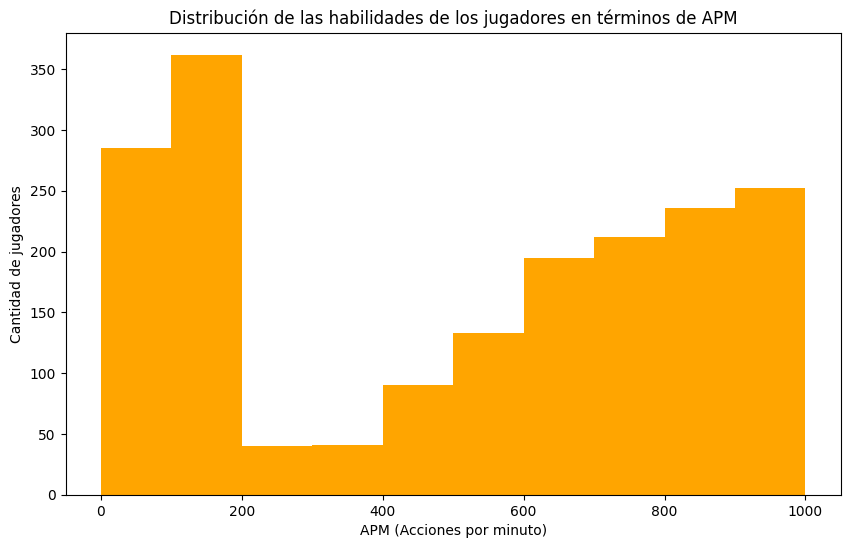

In [ ]:
# Agrupar las tasas de APM en rangos y mostrar la distribución de las habilidades de los jugadores en términos de APM
plt.figure(figsize=(10, 6))
apm_bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]  # Definir los límites de los rangos de APM
df['APM'].plot(kind='hist', bins=apm_bins, color='orange')
plt.title('Distribución de las habilidades de los jugadores en términos de APM')
plt.xlabel('APM (Acciones por minuto)')
plt.ylabel('Cantidad de jugadores')
plt.show()

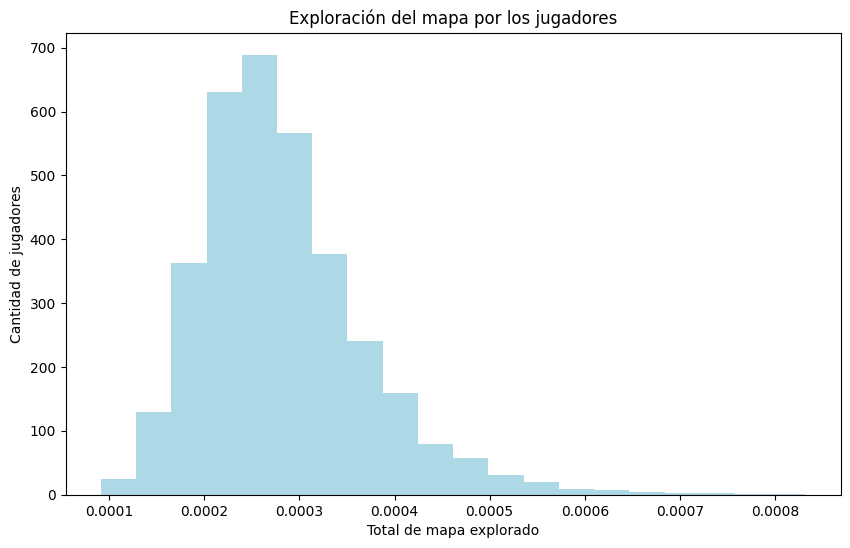

In [ ]:
# Gráfico de barras para comparar qué tan bien los jugadores exploran el mapa (TotalMapExplored)
plt.figure(figsize=(10, 6))
df['TotalMapExplored'].plot(kind='hist', bins=20, color='lightblue')
plt.title('Exploración del mapa por los jugadores')
plt.xlabel('Total de mapa explorado')
plt.ylabel('Cantidad de jugadores')
plt.show()

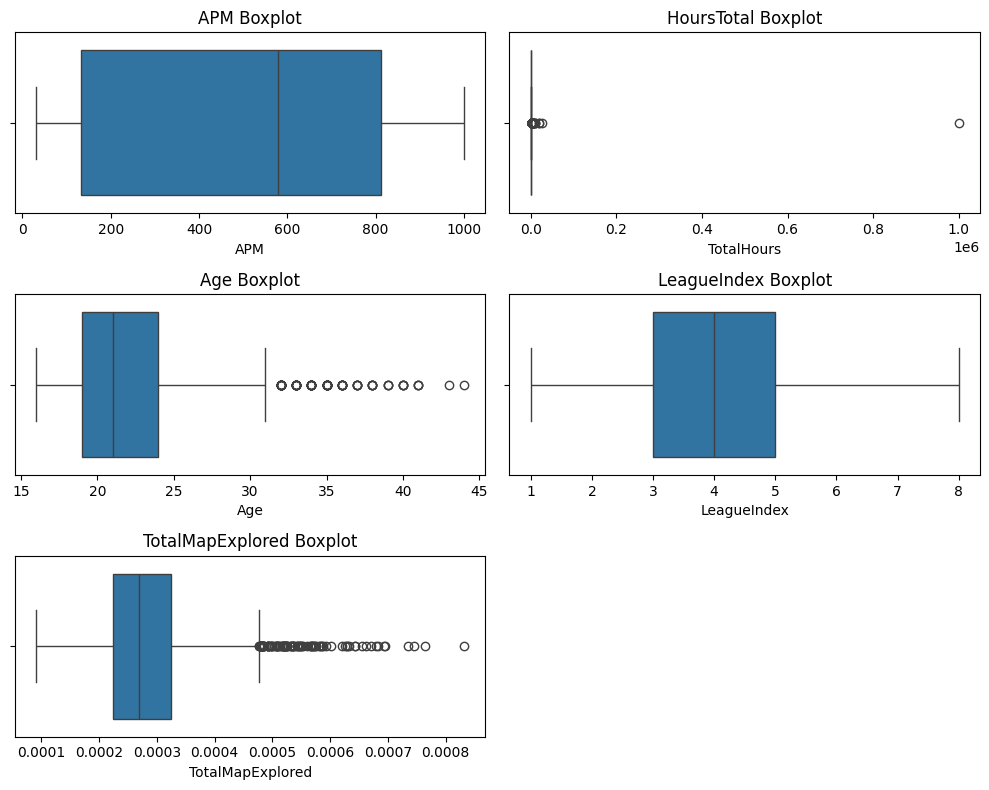

In [ ]:
# Aquí definimos el tamaño de la figura donde se mostrarán los gráficos
plt.figure(figsize=(10, 8))

# Boxplot para APM
plt.subplot(3, 2, 1) # 3 filas, 2 columnas, primer gráfico
sb.boxplot(x=df['APM'])
plt.title('APM Boxplot')

# Boxplot para HoursTotal
plt.subplot(3, 2, 2) # 3 filas, 2 columnas, segundo gráfico
sb.boxplot(x=df['TotalHours'])
plt.title('HoursTotal Boxplot')

# Boxplot para Age
plt.subplot(3, 2, 3) # 3 filas, 2 columnas, tercer gráfico
sb.boxplot(x=df['Age'])
plt.title('Age Boxplot')

# Boxplot para LeagueIndex
plt.subplot(3, 2, 4) # 3 filas, 2 columnas, cuarto gráfico
sb.boxplot(x=df['LeagueIndex'])
plt.title('LeagueIndex Boxplot')

# Boxplot para TotalMapExplored
plt.subplot(3, 2, 5) # 3 filas, 2 columnas, quinto gráfico
sb.boxplot(x=df['TotalMapExplored'])
plt.title('TotalMapExplored Boxplot')

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar los boxplots
plt.show()